<a href="https://colab.research.google.com/github/surabhi13gupta/CDS/blob/main/Module%208/MP1/Market_Basket_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Certification Program in Computational Data Science

##  A program by IISc and TalentSprint

### Mini Project 1: Market Basket analysis

## Learning Objectives

At the end of the experiment, you will be able to:

* extract summary level insight from a given dataset

* Integrate the data and identify the underlying pattern or structure

* understand the fundamentals of market basket analysis

* construct "rules" that provide concrete recommendations for businesses

## Dataset

The dataset chosen for this mini project is **Instacart Dataset**. The dataset is anonymized and contains a sample of over 3 million grocery orders from more than 200,000 Instacart users. For each user, there are orders between 4 and 100, with the sequence of products purchased in each order. The dataset also includes the products in each order, the time of day and day of week of each order, the name and aisle/department of each product, which are stored across various files.

## Problem Statement


Extract association rules and find groups of frequently purchased items from a large-scale grocery orders dataset.

## Grading = 10 Points

#### Import required packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

## **Stage 1**: Data Wrangling

We have five different files:

    - orders.csv
    - order_products__train.csv
    - products.csv
    - aisles.csv
    - departments.csv

These files contain the neccesary data to solve the problem. Load all the files correctly, after observing the header level details, data records etc

**Hint:** Use `read_csv` from pandas

In [2]:
#@title Download the data
!wget -qq https://cdn.iisc.talentsprint.com/CDS/Datasets/Instacart.zip
!unzip -qq Instacart.zip

### Load the data

Load all the given datasets

In [3]:
# YOUR CODE HERE
orders = pd.read_csv("/content/Instacart/orders.csv")
order_products__train = pd.read_csv("/content/Instacart/order_products__train.csv")
products = pd.read_csv("/content/Instacart/products.csv")
aisles = pd.read_csv("/content/Instacart/aisles.csv")
departments = pd.read_csv("/content/Instacart/departments.csv")

### Data Integration (1 point)

As the required data is present in different files, we need to integrate all the five to make single dataframe/dataset. For that purpose, use the unique identifier provided in all the dataframes so that it can be used to map the data in different files correctly.

**Example:** `product_id` is available in both `products` dataframe and `order_products__train` dataframe, we can merge these two into a single dataframe based on `product_id`

**Hint:** [pd.merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html)

In [31]:
# YOUR CODE HERE
combined_table = pd.merge(products, aisles, how='inner', on='aisle_id')
combined_table = pd.merge(combined_table, departments, how='inner', on='department_id')
combined_table = pd.merge(combined_table, order_products__train, how='inner', on='product_id')
combined_table = pd.merge(orders, combined_table, how='inner', on='order_id')

print("Order shape: ", orders.shape)
print("Order product table shape: ", order_products__train.shape)
print("Product table shape: ", products.shape)
print("Aisles shape: ", aisles.shape)
print("department df shape: ", departments.shape)

print("Combined table shape: ", combined_table.shape)

Order shape:  (3421083, 7)
Order product table shape:  (1384617, 4)
Product table shape:  (49688, 4)
Aisles shape:  (134, 2)
department df shape:  (21, 2)
Combined table shape:  (1384617, 15)


In [32]:
combined_table.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,product_name,aisle_id,department_id,aisle,department,add_to_cart_order,reordered
0,1187899,1,train,11,4,8,14.0,196,Soda,77,7,soft drinks,beverages,1,1
1,1187899,1,train,11,4,8,14.0,10258,Pistachios,117,19,nuts seeds dried fruit,snacks,6,1
2,1187899,1,train,11,4,8,14.0,13032,Cinnamon Toast Crunch,121,14,cereal,breakfast,7,1
3,1187899,1,train,11,4,8,14.0,25133,Organic String Cheese,21,16,packaged cheese,dairy eggs,2,1
4,1187899,1,train,11,4,8,14.0,26088,Aged White Cheddar Popcorn,23,19,popcorn jerky,snacks,8,1


### Understanding relationships and new insights from the data (3 points)

1.  How many times was each product ordered?

    **Hint:** group orders by product
    

2.  Find the number of orders per department and visualize using an appropriate plot


3.  On which day of the week do customers tend to buy more groceries? Which are the peak hours
of shopping?

  * Find the frequency of orders on week days using an appropriate plot
  * Find the frequency of orders during hours of the day using an appropriate plot?
  

4. Find the ratio of Re-ordered and Not Re-ordered products and visualize it

5. Plot the heatmap of Re-order ratio of the Day of week vs Hour of day

In [48]:
# YOUR CODE HERE

print("Total number of products in inventory: ", len(products))

print("Products ordered : ", len(order_products__train['product_id'].unique()))

print("Number of products never ordered: ", len(products) - len(order_products__train['product_id'].unique()))
print("How many times was each product ordered\n")

product_order_counts = combined_table.groupby('product_name')['order_id'].count().reset_index()
product_order_counts = product_order_counts.rename(columns={'order_id': 'order_count'})
print("Number of times each product was ordered:")
print(product_order_counts.sort_values(by='order_count', ascending=False))

Total number of products in inventory:  49688
Products ordered :  39123
Number of products never ordered:  10565
How many times was each product ordered

Number of times each product was ordered:
                     product_name  order_count
2814                       Banana        18726
2641       Bag of Organic Bananas        15480
25128        Organic Strawberries        10894
22496        Organic Baby Spinach         9784
17475                 Large Lemon         8135
...                           ...          ...
7417         Clean Curve Dishwand            1
7422   Clean Day Countertop Spray            1
26323          Original Shave Gel            1
26326     Original Silver Tequila            1
26328      Original Slaw Dressing            1

[39123 rows x 2 columns]


In [50]:
print("Second analysis: Number of orders per department")

orders_per_department = combined_table.groupby('department')['order_id'].nunique().reset_index()
orders_per_department = orders_per_department.rename(columns={'order_id': 'order_count'})
orders_per_department

Second analysis: Number of orders per department


,department,order_count
0,alcohol,3105
1,babies,6362
2,bakery,36424
3,beverages,61482
4,breakfast,21879
5,bulk,1323
6,canned goods,29416
7,dairy eggs,87400
8,deli,32281
9,dry goods pasta,25876


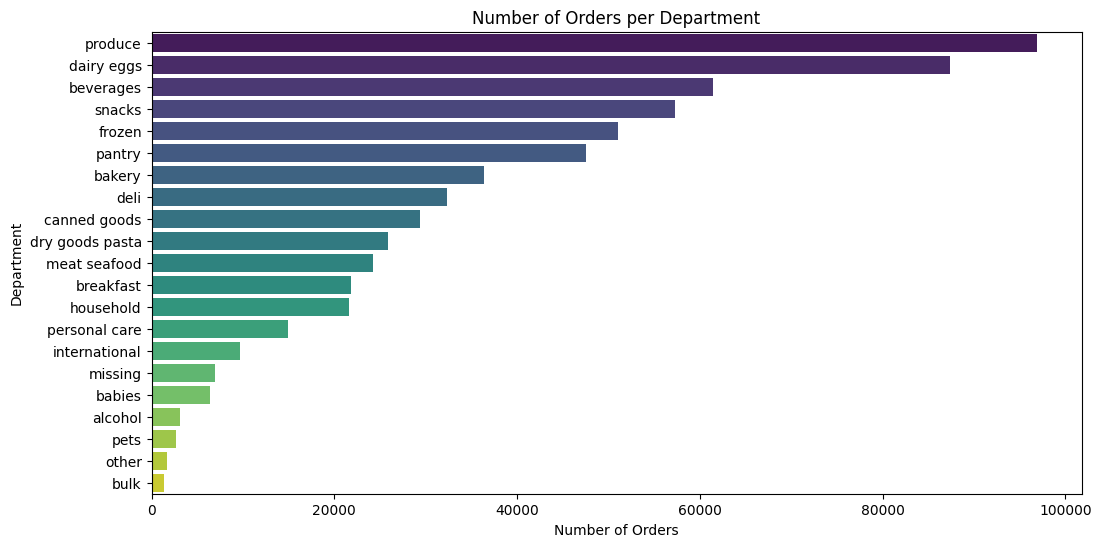

In [91]:
# Sort for better visualization
orders_per_department = orders_per_department.sort_values(by='order_count', ascending=False)

# Visualize using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='order_count', y='department', data=orders_per_department, palette='viridis')
plt.title('Number of Orders per Department')
plt.xlabel('Number of Orders')
plt.ylabel('Department')
plt.show()

In [57]:
print("Which day of the week do customers tend to buy more groceries \n")

orders_by_day = combined_table['order_dow'].value_counts().sort_index()
# Map day numbers to names for better readability (assuming 0 is Sunday and 6 is Saturday)
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
orders_by_day.index = [day_names[i] for i in orders_by_day.index]

print("\nOrders by day of the week:")
print(orders_by_day)

Which day of the week do customers tend to buy more groceries 


Orders by day of the week:
Sunday       324026
Monday       205978
Tuesday      160562
Wednesday    154381
Thursday     155481
Friday       176910
Saturday     207279
Name: count, dtype: int64


/tmp/ipython-input-58-3698936537.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='plasma')


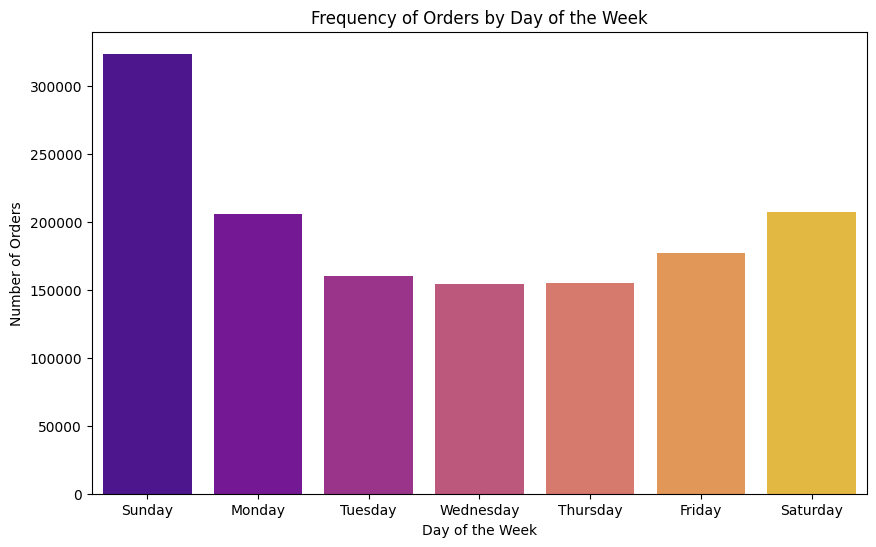

In [58]:
# Visualize frequency of orders on weekdays
plt.figure(figsize=(10, 6))
sns.barplot(x=orders_by_day.index, y=orders_by_day.values, palette='plasma')
plt.title('Frequency of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Orders')
plt.show()

In [59]:
print("Peak hours of shopping \n")

orders_by_hour = combined_table['order_hour_of_day'].value_counts().sort_index()

print("\nOrders by hour of the day:")
print(orders_by_hour)

Peak hours of shopping 


Orders by hour of the day:
order_hour_of_day
0       9083
1       5626
2       3226
3       2438
4       2431
5       3847
6      11847
7      36302
8      67386
9      93856
10    110479
11    114119
12    111752
13    114762
14    119370
15    116198
16    110237
17     96944
18     76522
19     58175
20     40920
21     34813
22     27319
23     16965
Name: count, dtype: int64


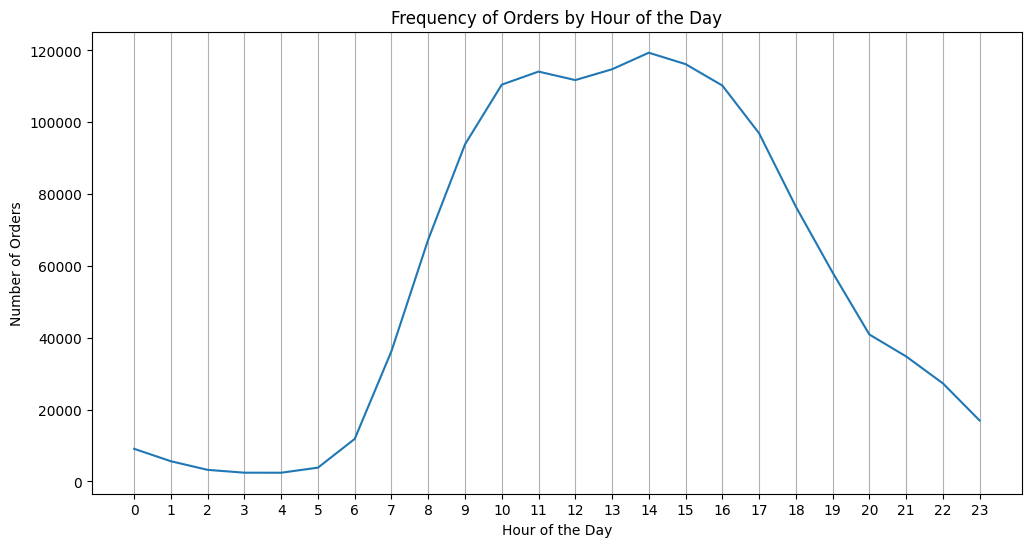

In [60]:
# Visualize frequency of orders during hours of the day
plt.figure(figsize=(12, 6))
sns.lineplot(x=orders_by_hour.index, y=orders_by_hour.values)
plt.title('Frequency of Orders by Hour of the Day')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
plt.xticks(np.arange(0, 24, 1)) # Ensure all hours are shown on the x-axis
plt.grid(axis='x')
plt.show()

In [62]:
combined_table['reordered'].value_counts()

,count
reordered,
1,828824
0,555793



Ratio of Re-ordered to Not Re-ordered products: 1.49


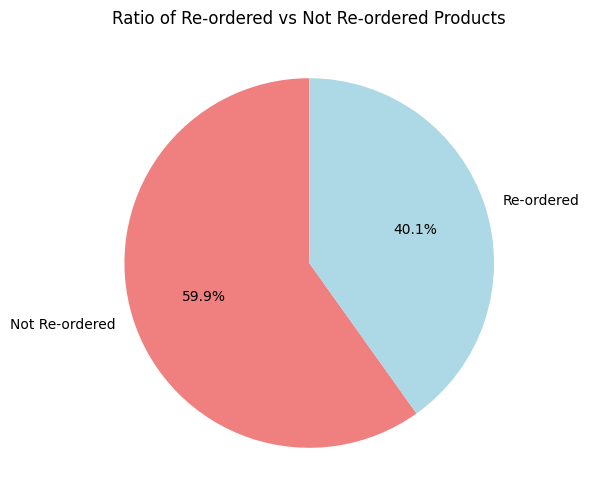

In [66]:
reorder_counts = combined_table['reordered'].value_counts()

# 0: Not Re-ordered, 1: Re-ordered
reorder_ratio = reorder_counts[1] / reorder_counts[0]
print(f"\nRatio of Re-ordered to Not Re-ordered products: {reorder_ratio:.2f}")

# Visualize the ratio
plt.figure(figsize=(6, 6))
reorder_counts.plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightblue'], labels=['Not Re-ordered', 'Re-ordered'], startangle=90)
plt.title('Ratio of Re-ordered vs Not Re-ordered Products')
plt.axis('off')
plt.show()

In [72]:
7*24

168

In [71]:
reorder_heatmap_data = combined_table.groupby(['order_dow', 'order_hour_of_day'])['reordered'].mean().reset_index()
# Map day numbers to names for better readability (assuming 0 is Sunday and 6 is Saturday)
day_names = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
reorder_heatmap_data.order_dow = [day_names[i] for i in reorder_heatmap_data.order_dow]
reorder_heatmap_data

,order_dow,order_hour_of_day,reordered
0,Sunday,0,0.577806
1,Sunday,1,0.587189
2,Sunday,2,0.593341
3,Sunday,3,0.553435
4,Sunday,4,0.599455
...,...,...,...
163,Saturday,19,0.577114
164,Saturday,20,0.604114
165,Saturday,21,0.618027
166,Saturday,22,0.643312


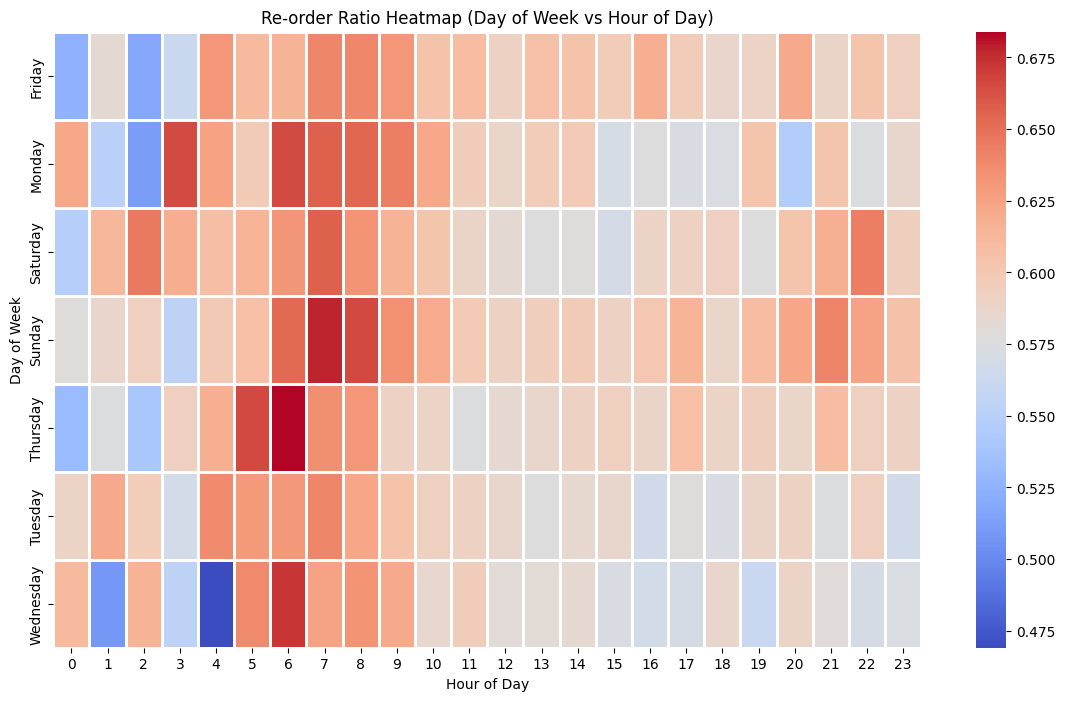

In [77]:
# Pivot the data to create a matrix suitable for a heatmap
heatmap_pivot = reorder_heatmap_data.pivot(index='order_dow', columns='order_hour_of_day', values='reordered')

# Plot the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_pivot, cmap='coolwarm', linewidths=1)
plt.title('Re-order Ratio Heatmap (Day of Week vs Hour of Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week')
plt.show()

## **Stage 2:** Create a basket (4 points)

As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it.

**Assumption:** Segment the data by considering the 100 most frequent ordered items. Please note it is just an assumption. You can consider 'n' frequent order items as per your choice.

**Hint:**

- Drop the unwanted columns

- Find the frequencies of orders based on the products and  consider the 100 most frequent order items.

    **Hint:** Count the frequencies of orders for each product_id using `groupby()` and `count()` respectively

- Extract the records of 100 most frequent items (which are extracted in previous step) from combined dataframe.

- Create a Pivot table with `order_id` as index and `product_name` as columns and `reorder` as values.

    - set the `order_id` as index using set_index()
    - fill all the nan values with 0

- After performing the above step, there are a lot of zeros in the data, make sure that any positive values are converted to a 1 and anything less than 0 is set to 0.


In [ ]:
# YOUR CODE HERE

## **Stage 3:** Apply Apriori algorithm (2 points)

- As the dataset contains huge amount of data, let us take a subset of the data to extract the association rules from it.

  **Assumption:** Segment the basket by considering 100000 records. Please note its just an assumption, you can consider 'n'  records as per your choice.

  **Hint:** [apriori](http://rasbt.github.io/mlxtend/api_subpackages/mlxtend.frequent_patterns/)

- Find the association rules and make a dataframe

In [ ]:
# YOUR CODE HERE